Workout AI: desc

In [173]:
!git clone https://github.com/enriqueesanchz/workoutAI.git

fatal: destination path 'workoutAI' already exists and is not an empty directory.


In [174]:
#Leo los archivos.csv
import os

for archivo in os.listdir('workoutAI/data/csv'):
  print(archivo)

press_sentado.csv
press_inclinado_2.csv
biceps_martillo.csv
press_sentado_2.csv
jalon_unilateral.csv
triceps_polea.csv
remo_bajo.csv
press_inclinado.csv
biceps_unilateral.csv
press_militar_2.csv
jalon_al_pecho.csv
triceps_unilateral.csv
press_militar.csv


In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Especifica el directorio que contiene los archivos CSV
directorio = 'workoutAI/data/csv'

# Obtén la lista de archivos en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Inicializa un DataFrame vacío
train = pd.DataFrame()
test = pd.DataFrame()

# Itera sobre la lista de archivos CSV
for archivo in archivos_csv:
    # Construye la ruta completa del archivo
    ruta_archivo = os.path.join(directorio, archivo)

    # Lee el archivo CSV actual en un DataFrame
    df_actual = pd.read_csv(ruta_archivo)

    # Añade una columna "actividad" con el nombre del archivo
    df_actual['actividad'] = archivo.rstrip('.csv').rstrip('_2')

    df_train, df_test= train_test_split(df_actual, test_size=0.2, shuffle=False)

    # Concatena el DataFrame actual al DataFrame final
    train = pd.concat([train, df_train], ignore_index=True)
    test = pd.concat([test, df_test], ignore_index=True)

print(train.shape)
print(test.shape)

(29200, 8)
(7300, 8)


<ipython-input-176-37702384b8e7>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn") # estilo de gráficas


([<matplotlib.axis.XTick at 0x7e03270b4d00>,
 [Text(0, 0, 'press_sentado'),
  Text(1, 0, 'press_inclinado'),
  Text(2, 0, 'press_militar'),
  Text(3, 0, 'biceps_martillo'),
  Text(4, 0, 'jalon_unilateral'),
  Text(5, 0, 'triceps_polea'),
  Text(6, 0, 'remo_bajo'),
  Text(7, 0, 'biceps_unilateral'),
  Text(8, 0, 'jalon_al_pecho'),
  Text(9, 0, 'triceps_unilateral')])

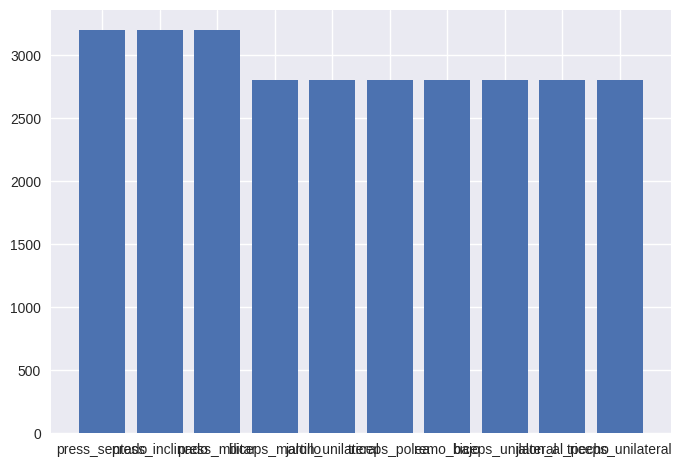

In [176]:
#Visualizamos la cantidad de datos que tenemos
import matplotlib.pyplot as plt
plt.style.use("seaborn") # estilo de gráficas

actividades = train['actividad'].value_counts()
plt.bar(range(len(actividades)), actividades.values)
plt.xticks(range(len(actividades)), actividades.index)

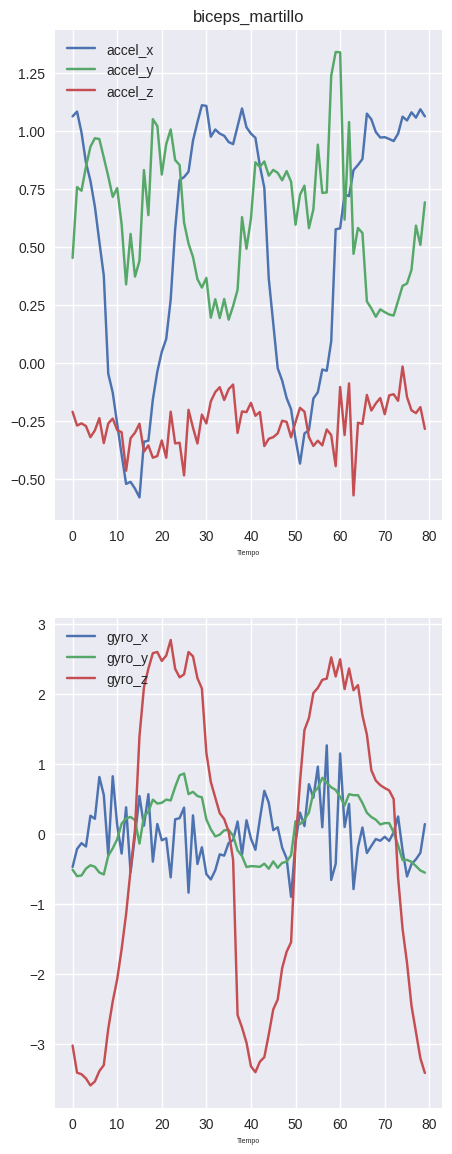

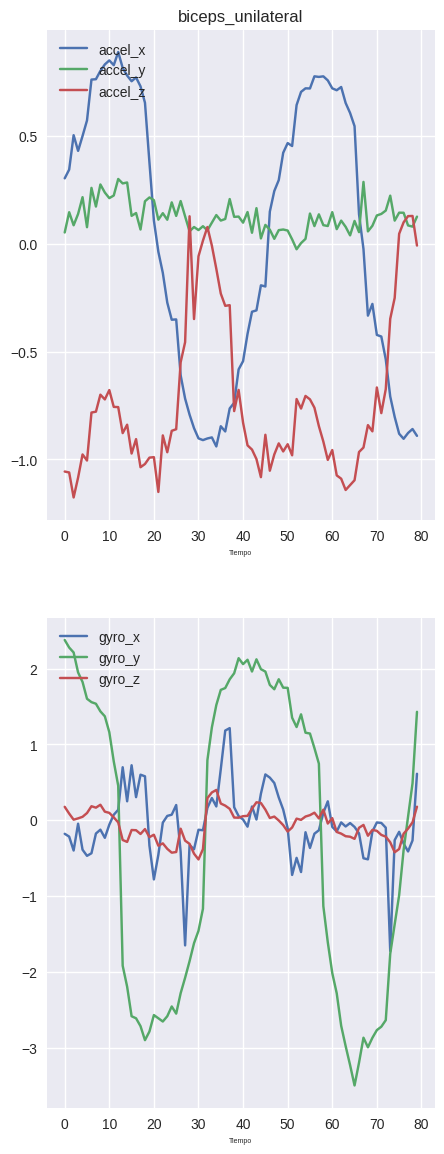

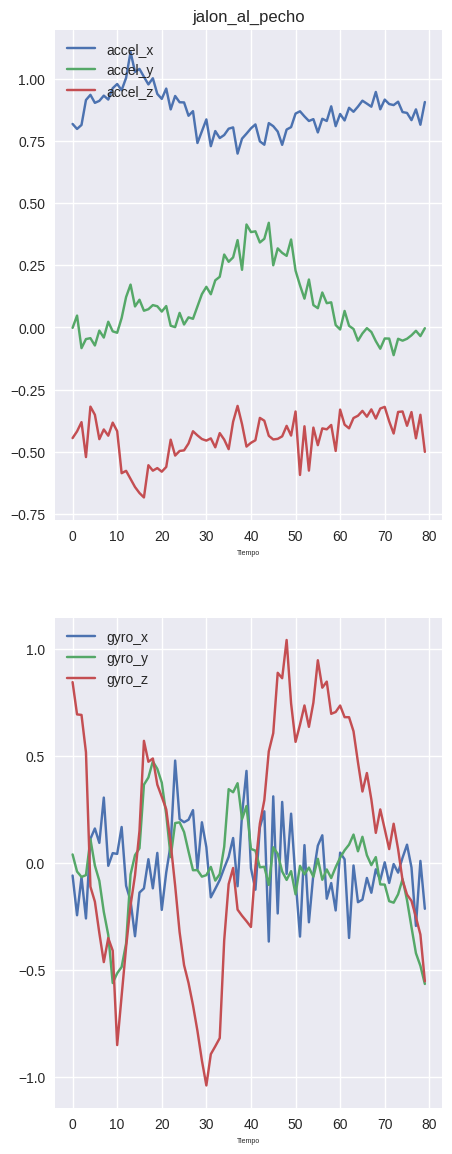

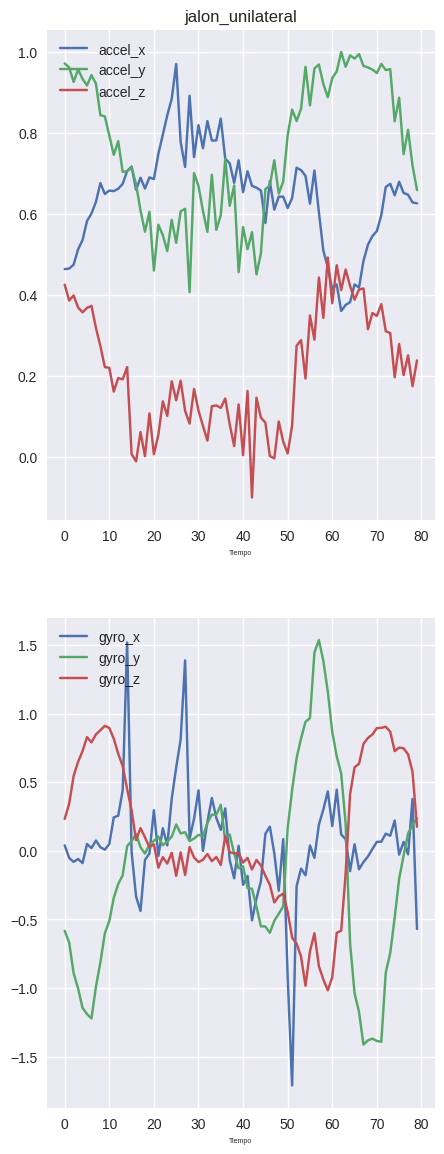

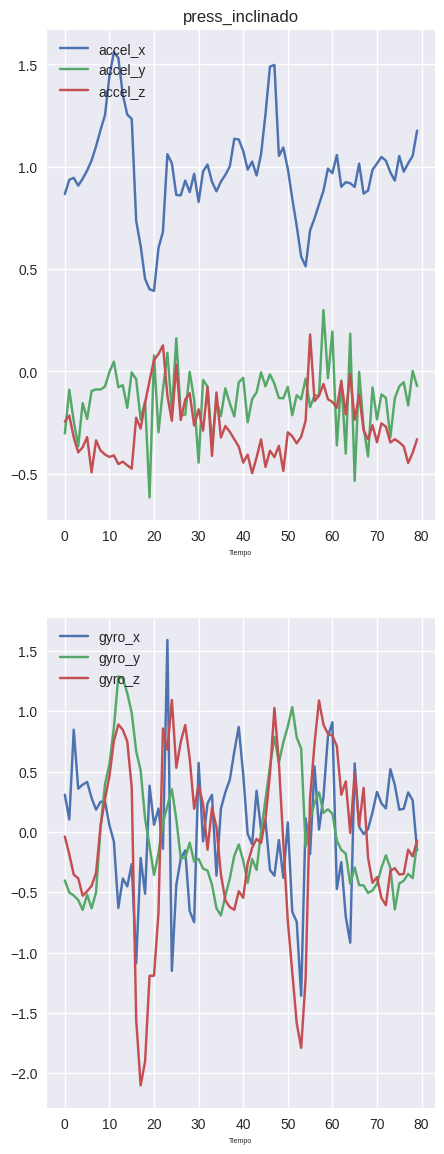

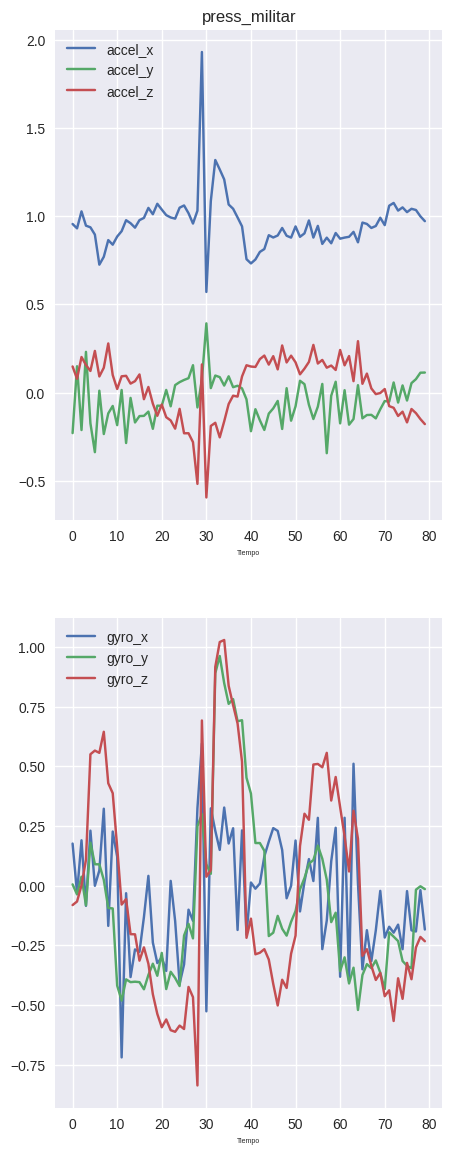

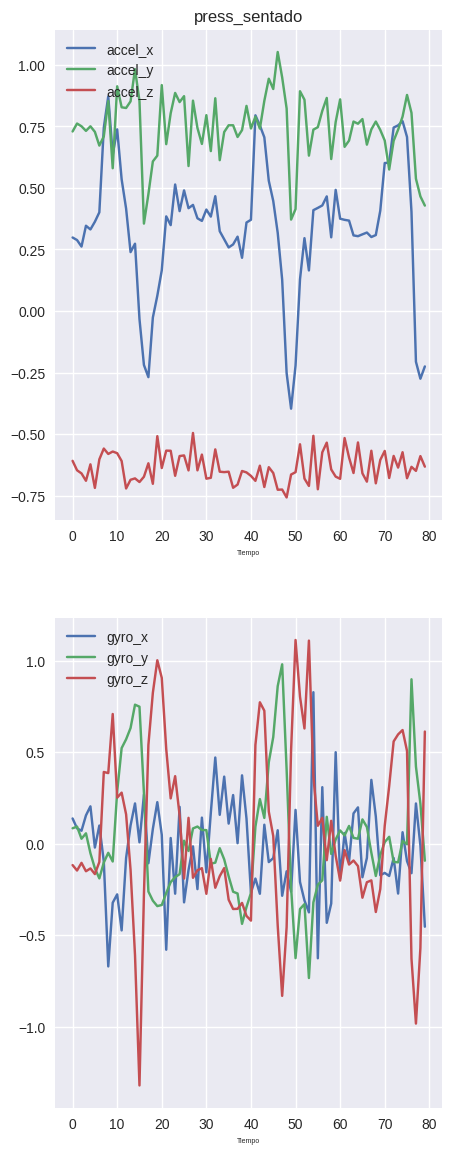

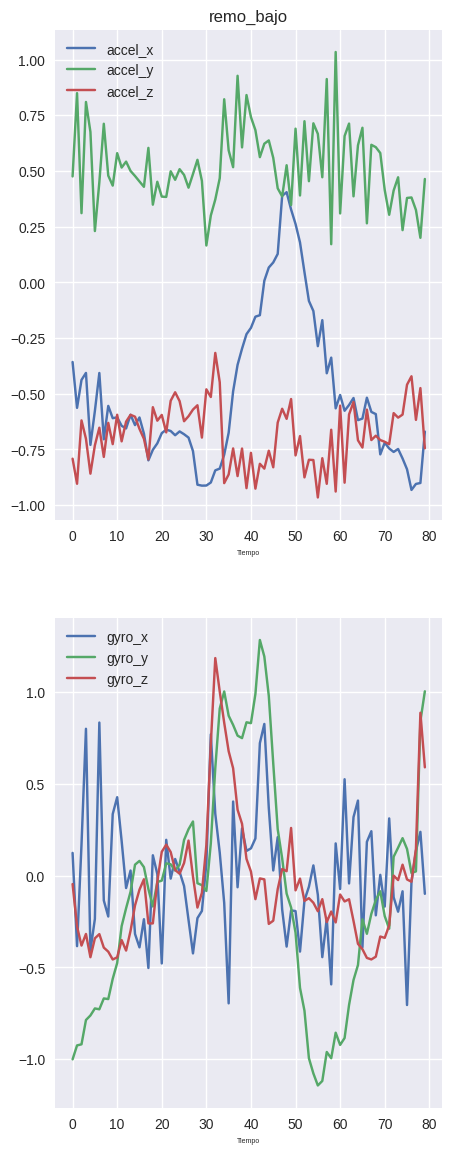

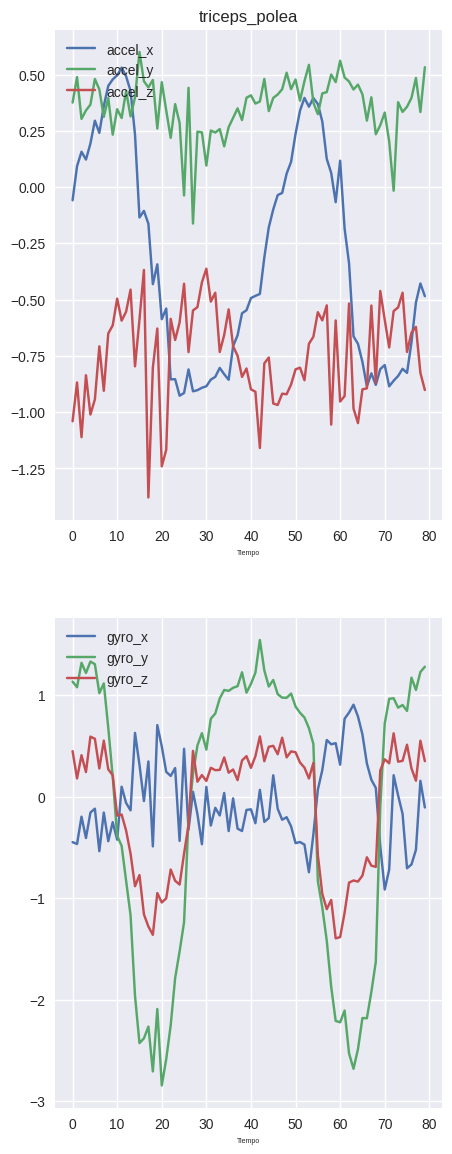

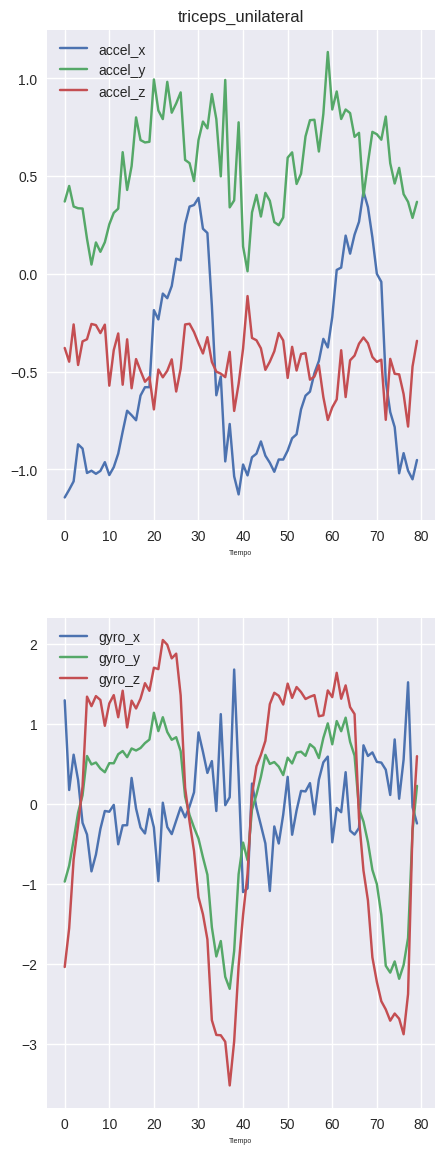

In [177]:
#%% visualizamos

def dibuja_datos_aceleracion(subset, actividad):
    plt.figure(figsize=(5,14))

    plt.subplot(211)
    plt.title(actividad)
    plt.xlabel("Tiempo", fontsize=5)
    plt.plot(subset["accel_x"].values, label='accel_x')
    plt.plot(subset["accel_y"].values, label='accel_y')
    plt.plot(subset["accel_z"].values, label='accel_z')
    plt.legend(loc="upper left")

    plt.subplot(212)
    plt.xlabel("Tiempo", fontsize=5)
    plt.plot(subset["gyro_x"].values, label='gyro_x')
    plt.plot(subset["gyro_y"].values, label='gyro_y')
    plt.plot(subset["gyro_z"].values, label='gyro_z')
    plt.legend(loc="upper left")


for actividad in np.unique(train['actividad']):
    subset = train[train['actividad'] == actividad][9*80:10*80]
    dibuja_datos_aceleracion(subset, actividad)

In [178]:
#%% Codificamos la actividad de manera numérica

from sklearn import preprocessing

LABEL = 'ActivityEncoded'
# Transformar las etiquetas de String a Integer mediante LabelEncoder
le = preprocessing.LabelEncoder()

# Añadir una nueva columna al DataFrame existente con los valores codificados
train[LABEL] = le.fit_transform(train['actividad'].values.ravel())
test[LABEL] = le.fit_transform(test['actividad'].values.ravel())

print(train[['actividad', 'ActivityEncoded']].value_counts())
print(test[['actividad', 'ActivityEncoded']].value_counts())

actividad           ActivityEncoded
press_inclinado     4                  3200
press_militar       5                  3200
press_sentado       6                  3200
biceps_martillo     0                  2800
biceps_unilateral   1                  2800
jalon_al_pecho      2                  2800
jalon_unilateral    3                  2800
remo_bajo           7                  2800
triceps_polea       8                  2800
triceps_unilateral  9                  2800
dtype: int64
actividad           ActivityEncoded
press_inclinado     4                  800
press_militar       5                  800
press_sentado       6                  800
biceps_martillo     0                  700
biceps_unilateral   1                  700
jalon_al_pecho      2                  700
jalon_unilateral    3                  700
remo_bajo           7                  700
triceps_polea       8                  700
triceps_unilateral  9                  700
dtype: int64


In [179]:
#%% Normalizamos los datos
#TODO: probar diferentes normalizaciones

for data in [train, test]:
  """
  data["accel_x"] = (data["accel_x"] - min(data["accel_x"].values)) / (max(data["accel_x"].values) - min(data["accel_x"].values))
  data["accel_y"] = (data["accel_y"] - min(data["accel_y"].values)) / (max(data["accel_y"].values) - min(data["accel_y"].values))
  data["accel_z"] = (data["accel_z"] - min(data["accel_z"].values)) / (max(data["accel_z"].values) - min(data["accel_z"].values))

  data["gyro_x"] = (data["gyro_x"] - min(data["gyro_x"].values)) / (max(data["gyro_x"].values) - min(data["gyro_x"].values))
  data["gyro_y"] = (data["gyro_y"] - min(data["gyro_y"].values)) / (max(data["gyro_y"].values) - min(data["gyro_y"].values))
  data["gyro_z"] = (data["gyro_z"] - min(data["gyro_z"].values)) / (max(data["gyro_z"].values) - min(data["gyro_z"].values))
  """
  data["accel_x"] = (data["accel_x"] ) / (max(data["accel_x"].values))
  data["accel_y"] = (data["accel_y"] ) / (max(data["accel_y"].values) )
  data["accel_z"] = (data["accel_z"] ) / (max(data["accel_z"].values) )

  data["gyro_x"] = (data["gyro_x"] ) / (max(data["gyro_x"].values) )
  data["gyro_y"] = (data["gyro_y"] ) / (max(data["gyro_y"].values) )
  data["gyro_z"] = (data["gyro_z"] ) / (max(data["gyro_z"].values) )

train.tail()
test.tail()

,t,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,actividad,ActivityEncoded
7295,194.766999,0.453657,0.238255,-0.011644,0.017527,-0.012123,-0.004159,press_militar,5
7296,194.803689,0.457565,0.245235,-0.004234,0.020454,-0.022875,-0.005910,press_militar,5
7297,194.884061,0.478447,0.236242,0.024616,0.023734,-0.013974,-0.003249,press_militar,5
7298,194.996217,0.448406,0.238792,-0.033521,0.010201,0.010730,-0.001737,press_militar,5
7299,195.044657,0.457443,0.249799,0.000357,0.004866,0.013372,-0.008094,press_militar,5


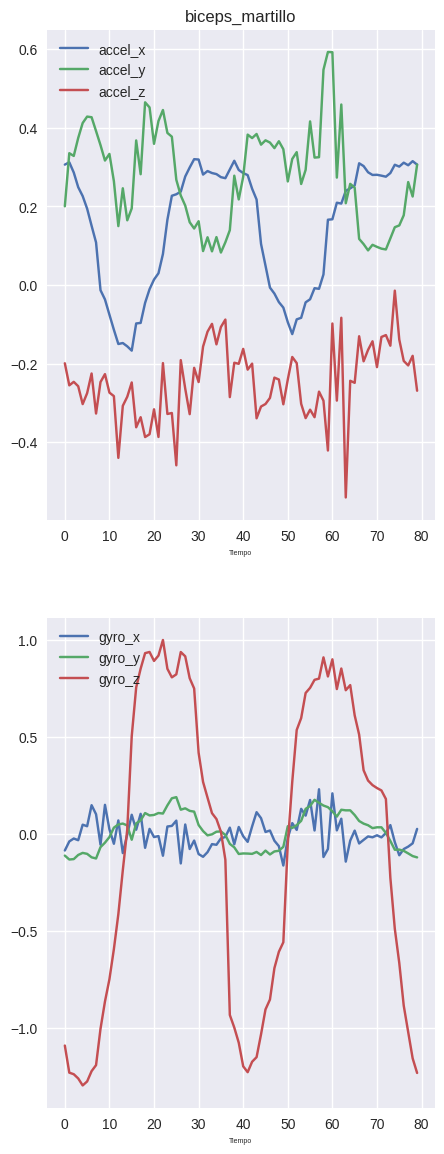

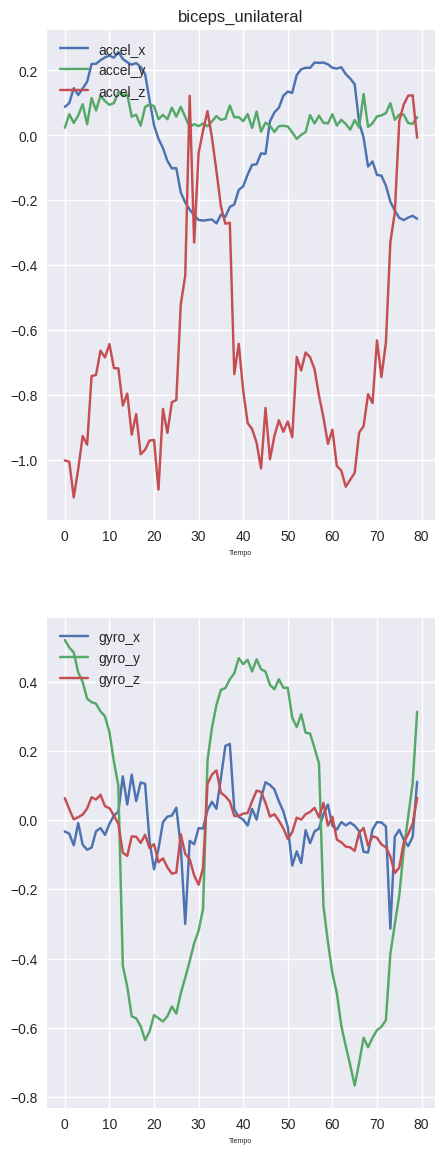

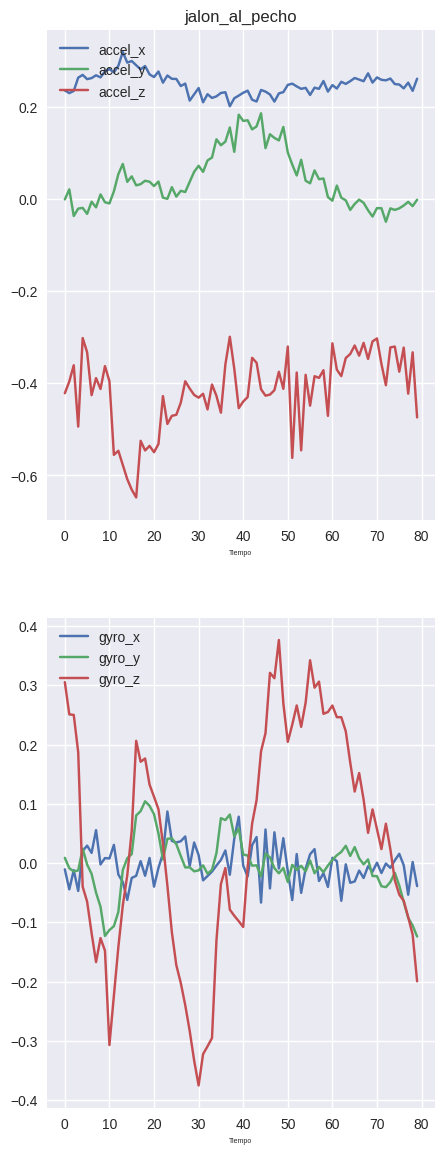

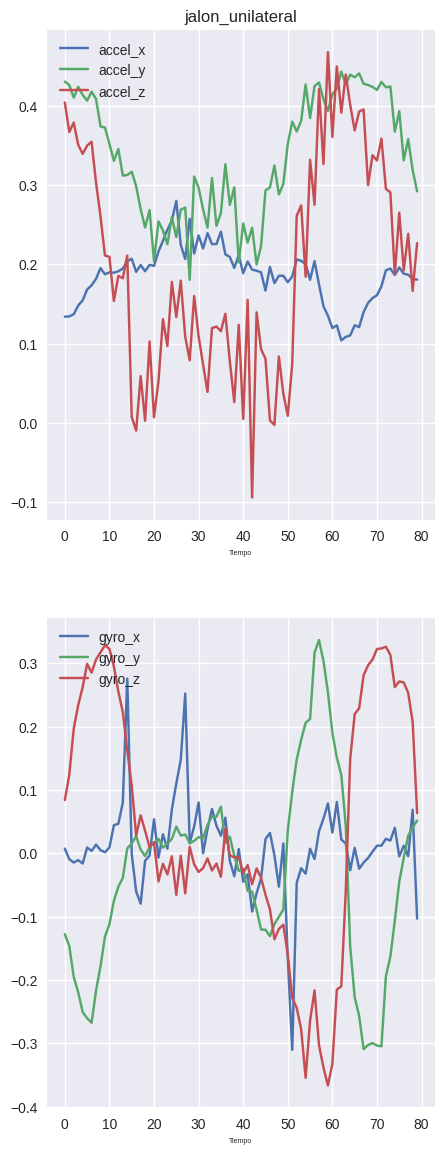

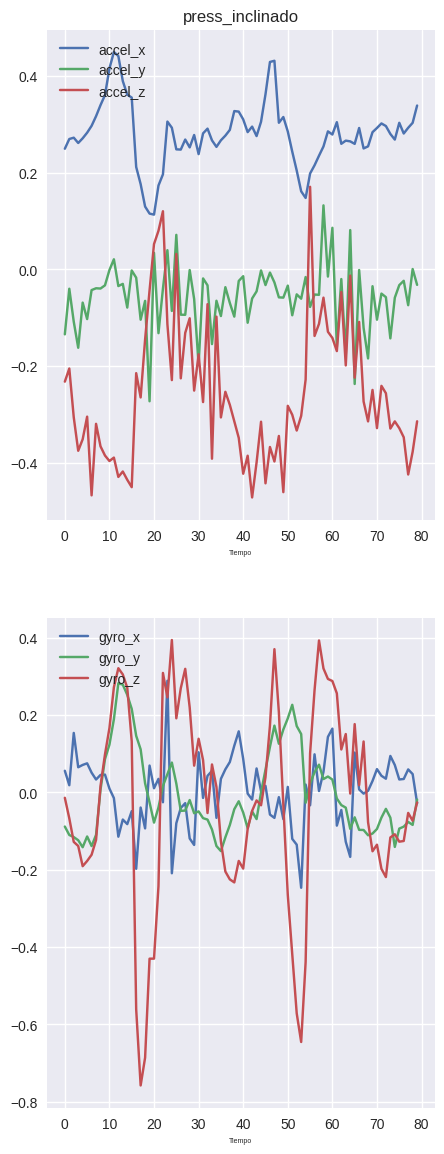

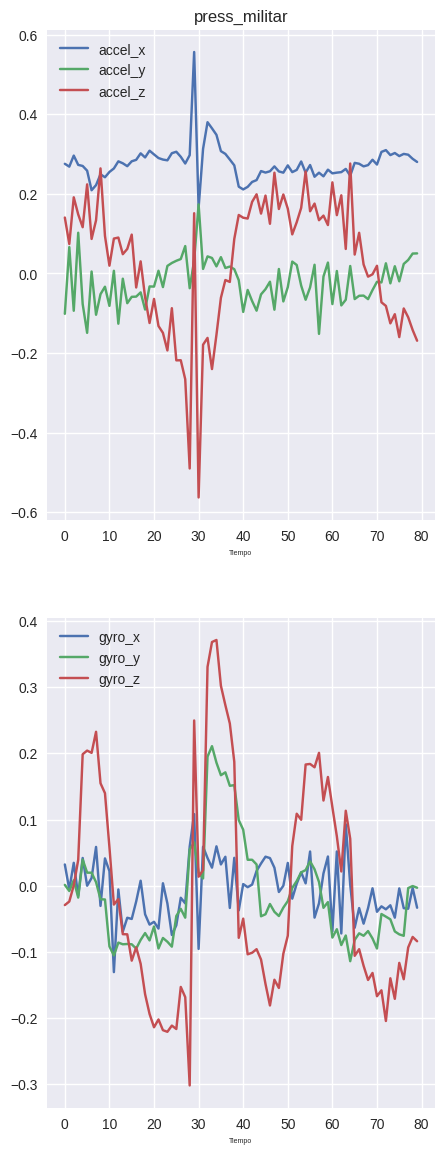

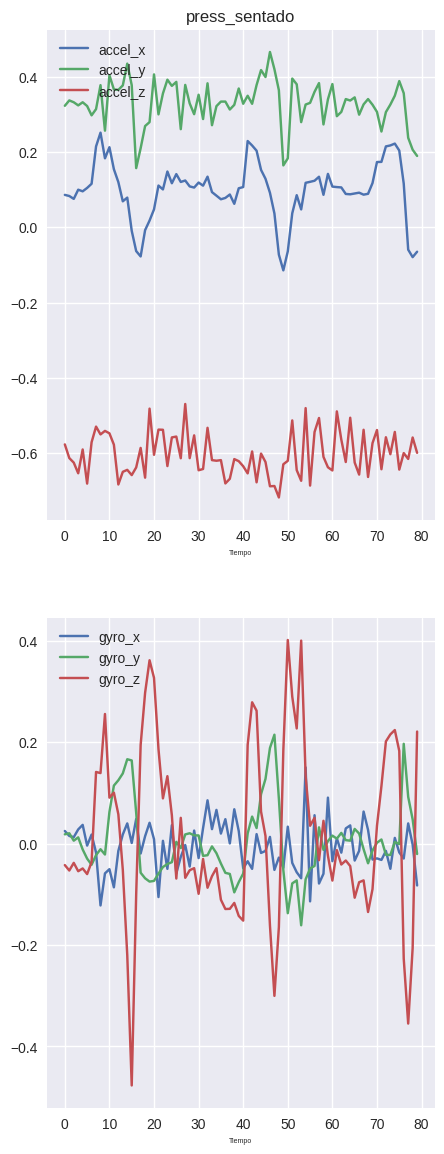

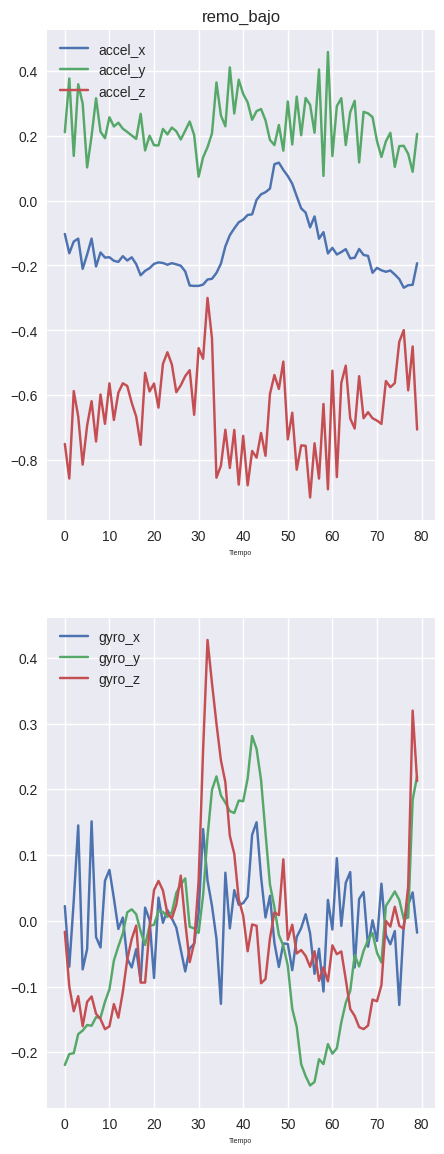

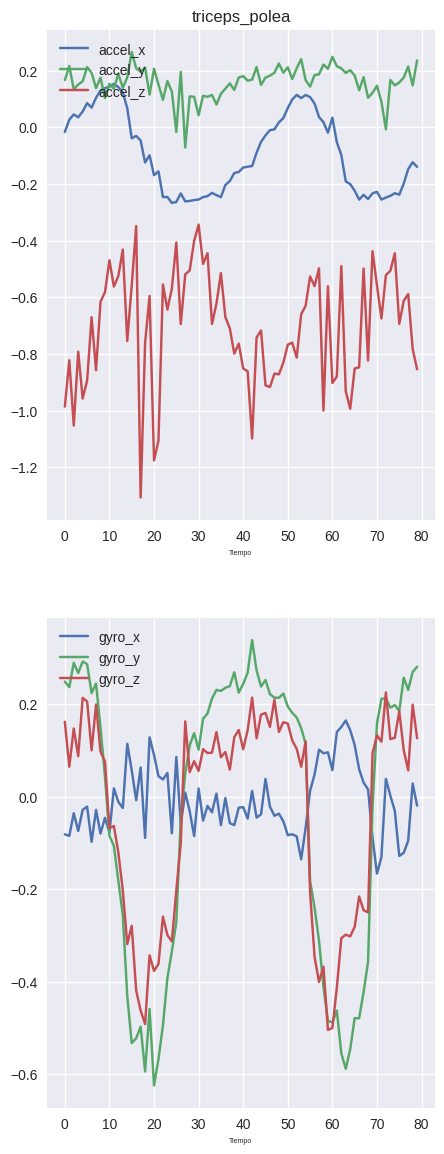

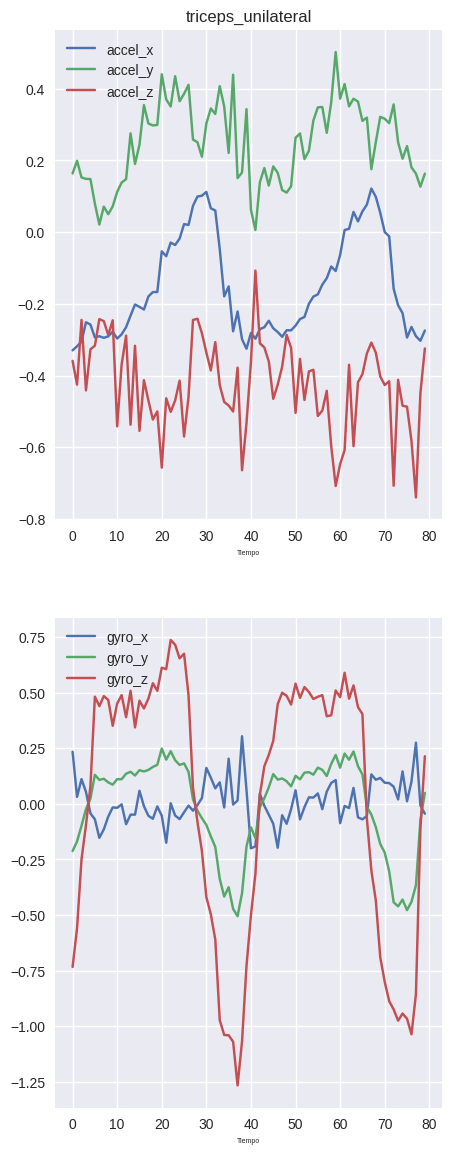

In [180]:
#Representamos para comprobar la normalizacion

for actividad in np.unique(train['actividad']):
    subset = train[train['actividad'] == actividad][9*80:10*80]
    dibuja_datos_aceleracion(subset, actividad)

In [181]:
#%% comprobamos cual ha sido la división

print("Entrenamiento", train.shape[0]/(train.shape[0]+test.shape[0]))
print("Test", test.shape[0]/(train.shape[0]+test.shape[0]))

Entrenamiento 0.8
Test 0.2


In [182]:
#%% Creamos las secuencias

from scipy import stats

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html

def create_segments_and_labels(df, time_steps, step, label_name):

    # x, y, z acceleraciones
    N_FEATURES = 6
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        accel_xs = df['accel_x'].values[i: i + time_steps]
        accel_ys = df['accel_y'].values[i: i + time_steps]
        accel_zs = df['accel_z'].values[i: i + time_steps]
        gyro_xs = df['gyro_x'].values[i: i + time_steps]
        gyro_ys = df['gyro_y'].values[i: i + time_steps]
        gyro_zs = df['gyro_z'].values[i: i + time_steps]
        # Lo etiquetamos como la actividad más frecuente
        label = stats.mode(df[label_name][i: i + time_steps])[0]
        segments.append([accel_xs, accel_ys, accel_zs, gyro_xs, gyro_ys, gyro_zs])
        labels.append(label)

    # Los pasamos a vector
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

TIME_PERIODS = 40
STEP_DISTANCE = 10

x_train, y_train = create_segments_and_labels(train,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

x_test, y_test = create_segments_and_labels(test,
                                              TIME_PERIODS,
                                              STEP_DISTANCE,
                                              LABEL)

In [183]:
#%% observamos la nueva forma de los datos (40, 6)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)


x_train shape:  (2916, 40, 6)
y_train shape:  (2916,)
x_test shape:  (726, 40, 6)
y_test shape:  (726,)


In [184]:
#%% datos de entrada de la red neuronal

num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
num_classes = le.classes_.size
print(list(le.classes_))

['biceps_martillo', 'biceps_unilateral', 'jalon_al_pecho', 'jalon_unilateral', 'press_inclinado', 'press_militar', 'press_sentado', 'remo_bajo', 'triceps_polea', 'triceps_unilateral']


In [185]:
#%% transformamos los datos a flotantes

x_train = x_train.astype('float32')
#y_train = y_train.astype('float32')

x_test = x_test.astype('float32')
#y_test = y_test.astype('float32')

In [186]:
#%% Realizamos el one-hote econding para los datos de salida

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
y_train_hot = cat_encoder.fit_transform(y_train.reshape(len(y_train),1))
y_train = y_train_hot.toarray()

In [187]:
#%% RED NEURONAL

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D

model_m = Sequential()
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS,
                                                            num_sensors)))
model_m.add(Conv1D(100, 10, activation='relu'))
#model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 31, 100)           6100      
                                                                 
 conv1d_33 (Conv1D)          (None, 22, 100)           100100    
                                                                 
 conv1d_34 (Conv1D)          (None, 13, 160)           160160    
                                                                 
 conv1d_35 (Conv1D)          (None, 4, 160)            256160    
                                                                 
 global_average_pooling1d_8  (None, 160)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_8 (Dropout)         (None, 160)               0         
                                                      

In [188]:

#%% determinamos la función de pérdida, optimizador y métrica de funcionamiento

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [189]:
#%% Entrenamiento

BATCH_SIZE = 400
EPOCHS = 50

history = model_m.fit(x_train,
                      y_train,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      verbose=1)


Epoch 1/50
8/8 [==============================] - 2s 17ms/step - loss: 2.0664 - accuracy: 0.2181
Epoch 2/50
8/8 [==============================] - 0s 16ms/step - loss: 1.3758 - accuracy: 0.4777
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 0.8726 - accuracy: 0.6968
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.5524 - accuracy: 0.8419
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3745 - accuracy: 0.9002
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2720 - accuracy: 0.9249
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2399 - accuracy: 0.9338
Epoch 8/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2052 - accuracy: 0.9465
Epoch 9/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1875 - accuracy: 0.9534
Epoch 10/50
8/8 [==============================] - 0s 9ms/step - loss: 0.1743 - accuracy: 0.9513
Epoch 11/50
8/8 [=============

In [190]:
# actualizar dependiendo del nombre del modelo guardado
y_test_hot = cat_encoder.fit_transform(y_test.reshape(len(y_test),1))
y_test = y_test_hot.toarray()

In [191]:
#%% Evaluamos el modelo en los datos de test
test_loss, test_acc = model_m.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)


23/23 [==============================] - 0s 3ms/step - loss: 2.2577 - accuracy: 0.7493
Test accuracy 0.7493112683296204
Test loss 2.257678508758545


In [192]:
#%%
from sklearn.metrics import classification_report

# Print confusion matrix for training data
y_pred_train = model_m.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
max_y_train = np.argmax(y_train, axis=1)
print(classification_report(max_y_train, max_y_pred_train))


92/92 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       281
           1       1.00      1.00      1.00       281
           2       1.00      0.99      0.99       281
           3       1.00      1.00      1.00       281
           4       1.00      1.00      1.00       320
           5       1.00      1.00      1.00       317
           6       1.00      1.00      1.00       317
           7       1.00      1.00      1.00       280
           8       1.00      1.00      1.00       279
           9       1.00      1.00      1.00       279

    accuracy                           1.00      2916
   macro avg       1.00      1.00      1.00      2916
weighted avg       1.00      1.00      1.00      2916



23/23 [==============================] - 0s 3ms/step


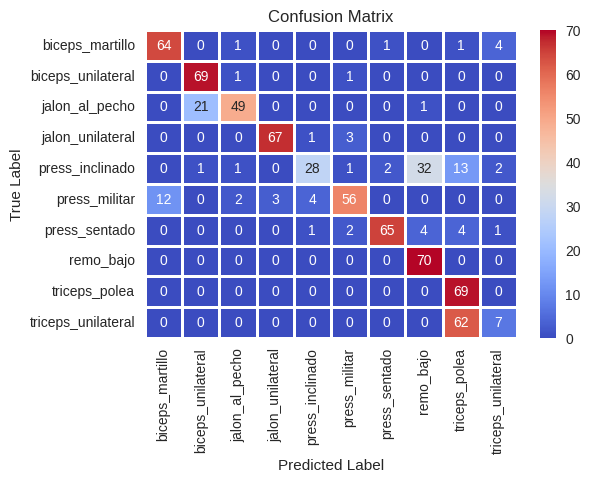

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        71
           1       0.76      0.97      0.85        71
           2       0.91      0.69      0.78        71
           3       0.96      0.94      0.95        71
           4       0.82      0.35      0.49        80
           5       0.89      0.73      0.80        77
           6       0.96      0.84      0.90        77
           7       0.65      1.00      0.79        70
           8       0.46      1.00      0.63        69
           9       0.50      0.10      0.17        69

    accuracy                           0.75       726
   macro avg       0.78      0.75      0.72       726
weighted avg       0.78      0.75      0.72       726



In [193]:
#%%
import seaborn as sns
from sklearn import metrics

LABELS = list(set(train['actividad']))
LABELS.sort()

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model_m.predict(x_test)
# Toma la clase con la mayor probabilidad a partir de las predicciones de la prueba
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))